In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_parquet("vep.parquet")
pred_cols = df.columns[-109:]
print(pred_cols)
df = df[df.AN >= 2000]
df["AF"] = df.AC / df.AN
df

Index(['DHS_Ath_flower_14_days', 'DHS_Ath_open_flower_normal',
       'DHS_Ath_inflorescence_normal', 'DHS_Ath_leaf_normal',
       'DHS_Ath_root_normal', 'DHS_Ath_root_7_days',
       'DHS_Ath_root_hair_7_days', 'DHS_Ath_root_non_hair_7_days',
       'DHS_Ath_root_non_hair_10_days',
       'DHS_Ath_seed_coat_4_days_past_anthesis_rep1',
       ...
       'TFBS_AT5G61850_Ath_seedling_complete_seedlings_rep2',
       'TFBS_AT5G61850_Ath_seedling_complete_seedlings_rep3',
       'TFBS_AT5G61850_Ath_seedling_complete_seedlings_rep4',
       'TFBS_AT5G63790_Ath_seedling_ABA_treatment_for_4h',
       'TFBS_AT5G63790_Ath_seedling_normal',
       'TFBS_AT5G65310_Ath_seedling_ABA_treatment_for_4h',
       'TFBS_AT5G65310_Ath_seedling_normal',
       'TFBS_AT5G67300_Ath_seedling_ABA_treatment_for_4h',
       'TFBS_AT5G67300_Ath_seedling_normal',
       'TFBS_AT5G17430_Ath_somatic_embryo_24-D_induced_somatic_embryos_rep1'],
      dtype='object', length=109)


,chromosome,pos,ref,alt,AC,AN,closest_TSS,dist_to_TSS,DHS_Ath_flower_14_days,DHS_Ath_open_flower_normal,...,TFBS_AT5G61850_Ath_seedling_complete_seedlings_rep3,TFBS_AT5G61850_Ath_seedling_complete_seedlings_rep4,TFBS_AT5G63790_Ath_seedling_ABA_treatment_for_4h,TFBS_AT5G63790_Ath_seedling_normal,TFBS_AT5G65310_Ath_seedling_ABA_treatment_for_4h,TFBS_AT5G65310_Ath_seedling_normal,TFBS_AT5G67300_Ath_seedling_ABA_treatment_for_4h,TFBS_AT5G67300_Ath_seedling_normal,TFBS_AT5G17430_Ath_somatic_embryo_24-D_induced_somatic_embryos_rep1,AF
0,Chr5,4014,G,A,12,2242,AT5G01010.2,980,-0.352809,-0.108418,...,0.036564,-0.014503,0.178023,0.200675,0.038344,-0.000864,0.083597,0.049786,0.129127,0.005352
1,Chr5,4051,T,C,12,2218,AT5G01010.2,943,0.097200,0.099005,...,-0.041711,0.121516,-0.246600,-0.168628,-0.019211,0.058068,0.041719,0.147327,0.013399,0.005410
2,Chr5,4053,A,C,2,2230,AT5G01010.2,941,0.023971,0.068407,...,0.020077,0.115344,-0.092571,-0.019265,0.053585,0.068530,0.021884,0.084291,0.124229,0.000897
3,Chr5,4128,G,A,36,2238,AT5G01010.2,866,-0.162379,-0.160685,...,0.019351,-0.029964,-0.116629,-0.093959,-0.104677,-0.073426,-0.074594,-0.049419,-0.028360,0.016086
4,Chr5,4144,T,C,12,2224,AT5G01010.2,850,-0.069134,-0.187080,...,0.130736,0.031218,-0.038479,-0.148822,-0.008571,-0.084561,0.122195,0.193924,-0.012261,0.005396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chr5,263867,A,G,90,2242,AT5G01700.1,-416,0.097095,0.244982,...,-0.003668,0.029466,0.020302,0.027400,-0.144275,-0.140322,-0.042861,-0.005447,0.007037,0.040143
9996,Chr5,263870,C,T,90,2234,AT5G01700.1,-419,-0.212146,-0.111723,...,-0.105334,-0.147423,-0.123220,-0.134969,-0.064276,-0.087801,-0.234011,-0.193492,-0.065279,0.040286
9997,Chr5,263889,C,T,10,2252,AT5G01700.1,-438,0.052217,0.126436,...,0.049959,0.080396,-0.034245,-0.043789,0.009349,0.022134,0.040047,0.042810,0.056089,0.004440
9998,Chr5,263918,A,C,4,2238,AT5G01700.1,-467,0.203289,0.068920,...,0.066137,0.236563,0.226845,0.286695,0.077378,0.122007,0.052299,0.034410,-0.026445,0.001787


In [7]:
df.loc[:, "delta_pred_l1_norm"] = df.apply(lambda row: np.linalg.norm(row[pred_cols], ord=1), axis=1)
df.loc[:, "delta_pred_l2_norm"] = df.apply(lambda row: np.linalg.norm(row[pred_cols], ord=2), axis=1)
df.loc[:, "delta_pred_linf_norm"] = df.apply(lambda row: np.linalg.norm(row[pred_cols], ord=np.inf), axis=1)
df

,chromosome,pos,ref,alt,AC,AN,closest_TSS,dist_to_TSS,DHS_Ath_flower_14_days,DHS_Ath_open_flower_normal,...,TFBS_AT5G63790_Ath_seedling_normal,TFBS_AT5G65310_Ath_seedling_ABA_treatment_for_4h,TFBS_AT5G65310_Ath_seedling_normal,TFBS_AT5G67300_Ath_seedling_ABA_treatment_for_4h,TFBS_AT5G67300_Ath_seedling_normal,TFBS_AT5G17430_Ath_somatic_embryo_24-D_induced_somatic_embryos_rep1,AF,delta_pred_l1_norm,delta_pred_l2_norm,delta_pred_linf_norm
0,Chr5,4014,G,A,12,2242,AT5G01010.2,980,-0.352809,-0.108418,...,0.200675,0.038344,-0.000864,0.083597,0.049786,0.129127,0.005352,13.948242,1.659533,0.385360
1,Chr5,4051,T,C,12,2218,AT5G01010.2,943,0.097200,0.099005,...,-0.168628,-0.019211,0.058068,0.041719,0.147327,0.013399,0.005410,12.312111,1.490822,0.347635
2,Chr5,4053,A,C,2,2230,AT5G01010.2,941,0.023971,0.068407,...,-0.019265,0.053585,0.068530,0.021884,0.084291,0.124229,0.000897,9.063315,1.094503,0.345485
3,Chr5,4128,G,A,36,2238,AT5G01010.2,866,-0.162379,-0.160685,...,-0.093959,-0.104677,-0.073426,-0.074594,-0.049419,-0.028360,0.016086,11.498808,1.290090,0.245797
4,Chr5,4144,T,C,12,2224,AT5G01010.2,850,-0.069134,-0.187080,...,-0.148822,-0.008571,-0.084561,0.122195,0.193924,-0.012261,0.005396,21.640704,2.661350,0.783635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chr5,263867,A,G,90,2242,AT5G01700.1,-416,0.097095,0.244982,...,0.027400,-0.144275,-0.140322,-0.042861,-0.005447,0.007037,0.040143,9.410958,1.156513,0.294841
9996,Chr5,263870,C,T,90,2234,AT5G01700.1,-419,-0.212146,-0.111723,...,-0.134969,-0.064276,-0.087801,-0.234011,-0.193492,-0.065279,0.040286,23.622011,2.528502,0.451081
9997,Chr5,263889,C,T,10,2252,AT5G01700.1,-438,0.052217,0.126436,...,-0.043789,0.009349,0.022134,0.040047,0.042810,0.056089,0.004440,7.837478,1.045700,0.347484
9998,Chr5,263918,A,C,4,2238,AT5G01700.1,-467,0.203289,0.068920,...,0.286695,0.077378,0.122007,0.052299,0.034410,-0.026445,0.001787,15.486468,1.770592,0.448275


<AxesSubplot:xlabel='AF', ylabel='delta_pred_linf_norm'>

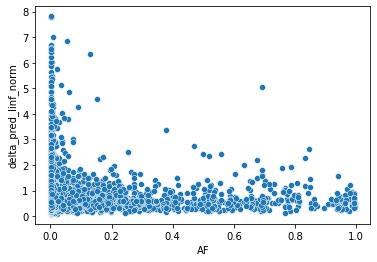

In [11]:
sns.scatterplot(data=df, x="AF", y="delta_pred_linf_norm")

<AxesSubplot:xlabel='AF', ylabel='delta_pred_l1_norm'>

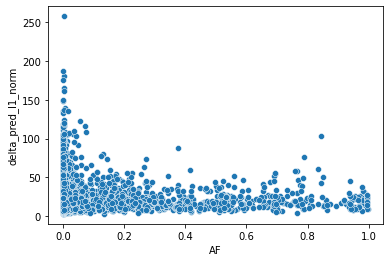

In [16]:
sns.scatterplot(data=df, x="AF", y="delta_pred_l1_norm")

<AxesSubplot:xlabel='AF', ylabel='delta_pred_l2_norm'>

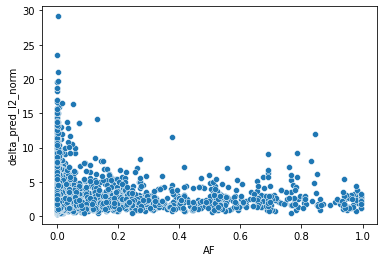

In [17]:
sns.scatterplot(data=df, x="AF", y="delta_pred_l2_norm")

In [23]:
df["id"] = df.index
df

,chromosome,pos,ref,alt,AC,AN,closest_TSS,dist_to_TSS,DHS_Ath_flower_14_days,DHS_Ath_open_flower_normal,...,TFBS_AT5G65310_Ath_seedling_ABA_treatment_for_4h,TFBS_AT5G65310_Ath_seedling_normal,TFBS_AT5G67300_Ath_seedling_ABA_treatment_for_4h,TFBS_AT5G67300_Ath_seedling_normal,TFBS_AT5G17430_Ath_somatic_embryo_24-D_induced_somatic_embryos_rep1,AF,delta_pred_l1_norm,delta_pred_l2_norm,delta_pred_linf_norm,id
0,Chr5,4014,G,A,12,2242,AT5G01010.2,980,-0.352809,-0.108418,...,0.038344,-0.000864,0.083597,0.049786,0.129127,0.005352,13.948242,1.659533,0.385360,0
1,Chr5,4051,T,C,12,2218,AT5G01010.2,943,0.097200,0.099005,...,-0.019211,0.058068,0.041719,0.147327,0.013399,0.005410,12.312111,1.490822,0.347635,1
2,Chr5,4053,A,C,2,2230,AT5G01010.2,941,0.023971,0.068407,...,0.053585,0.068530,0.021884,0.084291,0.124229,0.000897,9.063315,1.094503,0.345485,2
3,Chr5,4128,G,A,36,2238,AT5G01010.2,866,-0.162379,-0.160685,...,-0.104677,-0.073426,-0.074594,-0.049419,-0.028360,0.016086,11.498808,1.290090,0.245797,3
4,Chr5,4144,T,C,12,2224,AT5G01010.2,850,-0.069134,-0.187080,...,-0.008571,-0.084561,0.122195,0.193924,-0.012261,0.005396,21.640704,2.661350,0.783635,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chr5,263867,A,G,90,2242,AT5G01700.1,-416,0.097095,0.244982,...,-0.144275,-0.140322,-0.042861,-0.005447,0.007037,0.040143,9.410958,1.156513,0.294841,9995
9996,Chr5,263870,C,T,90,2234,AT5G01700.1,-419,-0.212146,-0.111723,...,-0.064276,-0.087801,-0.234011,-0.193492,-0.065279,0.040286,23.622011,2.528502,0.451081,9996
9997,Chr5,263889,C,T,10,2252,AT5G01700.1,-438,0.052217,0.126436,...,0.009349,0.022134,0.040047,0.042810,0.056089,0.004440,7.837478,1.045700,0.347484,9997
9998,Chr5,263918,A,C,4,2238,AT5G01700.1,-467,0.203289,0.068920,...,0.077378,0.122007,0.052299,0.034410,-0.026445,0.001787,15.486468,1.770592,0.448275,9998


In [28]:
df_melt = pd.melt(df, id_vars=["id", "AF"], value_vars=["delta_pred_l1_norm", "delta_pred_l2_norm", "delta_pred_linf_norm"], var_name="norm_order", value_name="norm")
df_melt

,id,AF,norm_order,norm
0,0,0.005352,delta_pred_l1_norm,13.948242
1,1,0.005410,delta_pred_l1_norm,12.312111
2,2,0.000897,delta_pred_l1_norm,9.063315
3,3,0.016086,delta_pred_l1_norm,11.498808
4,4,0.005396,delta_pred_l1_norm,21.640704
...,...,...,...,...
24871,9995,0.040143,delta_pred_linf_norm,0.294841
24872,9996,0.040286,delta_pred_linf_norm,0.451081
24873,9997,0.004440,delta_pred_linf_norm,0.347484
24874,9998,0.001787,delta_pred_linf_norm,0.448275


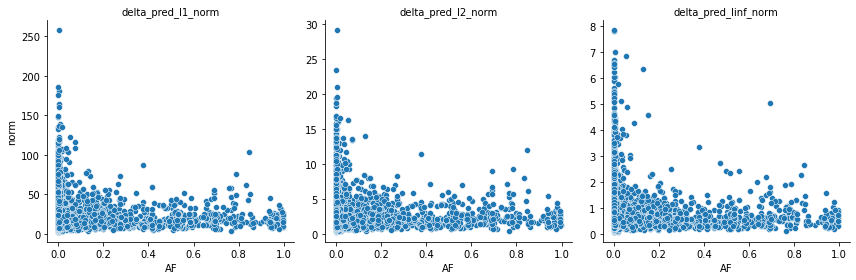

In [34]:
g = sns.relplot(
    data=df_melt,
    x="AF",
    y="norm",
    col="norm_order",
    height=4,
    facet_kws={'sharey': False, 'sharex': True},
)
g.set_titles("{col_name}");
plt.savefig("delta_pred_vs_AF.pdf", bbox_inches='tight')

<AxesSubplot:>

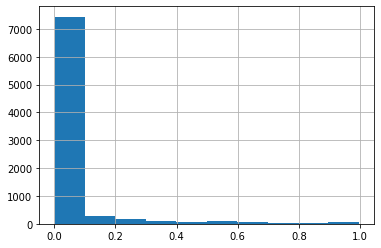

In [35]:
df.AF.hist()